Работу выполнили Золотухина Евгения и Рыбин Сергей

In [133]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
data = pd.read_csv('belgian_property_prices.csv', delimiter=',')
data

,as_built_plan,available_as_of,basement,bathrooms,bedroom_1_surface,bedroom_2_surface,bedroom_3_surface,bedrooms,building_condition,co2_emission,...,width_of_the_lot_on_the_street,yearly_theoretical_total_energy_consumption,housenumber,street,city,postal,state,lat,lng,price
0,0.0,After signing the deed,1.0,1.0,12.0,10.0,10.0,3.0,Good,9802.0,...,11.0,NaN,30,Stationsstraat,Ronse,9600.0,Vlaams Gewest,50.743367,3.601306,275000
1,0.0,After signing the deed,1.0,1.0,15.0,11.0,11.0,4.0,Good,NaN,...,NaN,NaN,52,Wingenesteenweg,Wingene,8750.0,Vlaams Gewest,51.042146,3.302600,430000
2,NaN,After signing the deed,1.0,3.0,22.0,22.0,22.0,5.0,As new,NaN,...,6.0,NaN,157,Mechelsesteenweg,Antwerpen,2018.0,Vlaams Gewest,51.205030,4.410943,949000
3,0.0,NaN,NaN,3.0,33.0,30.0,23.0,5.0,As new,NaN,...,19.0,NaN,66,Noordzandstraat,Brugge,8000.0,Vlaams Gewest,51.206826,3.219186,2200000
4,0.0,After signing the deed,NaN,NaN,19.0,NaN,NaN,1.0,Just renovated,58.0,...,5.0,24263.0,15,Rue de l'Etoile,Wavre,1301.0,Région Wallonne,50.717062,4.577550,195000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4765,1.0,After signing the deed,1.0,2.0,11.0,14.0,15.0,6.0,Good,NaN,...,NaN,NaN,594,Brusselsesteenweg,Asse,1731.0,Vlaams Gewest,50.884192,4.274010,944000
4766,NaN,After signing the deed,1.0,2.0,25.0,20.0,18.0,6.0,To be done up,NaN,...,NaN,NaN,31,Brusselsesteenweg,Zemst,1980.0,Vlaams Gewest,50.985378,4.466114,960000
4767,0.0,NaN,1.0,5.0,NaN,NaN,NaN,9.0,Good,NaN,...,NaN,129394.0,15,Rue de Nazareth,Ath,7800.0,Région Wallonne,50.630171,3.779321,750000
4768,0.0,To be defined,1.0,2.0,NaN,NaN,NaN,3.0,Good,NaN,...,9.0,NaN,8,Orteliuskaai,Antwerpen,2000.0,Vlaams Gewest,51.225206,4.399929,925000


In [135]:
data = data[['price', 'construction_year', 'outdoor_parking_spaces', 'garden_surface', 'state', 'co2_emission', 'heating_type']]
data

,price,construction_year,outdoor_parking_spaces,garden_surface,state,co2_emission,heating_type
0,275000,1953.0,3.0,350.0,Vlaams Gewest,9802.0,Fuel oil
1,430000,1987.0,NaN,6000.0,Vlaams Gewest,NaN,Fuel oil
2,949000,1887.0,NaN,33.0,Vlaams Gewest,NaN,Gas
3,2200000,1833.0,NaN,466.0,Vlaams Gewest,NaN,Gas
4,195000,1850.0,NaN,NaN,Région Wallonne,58.0,Gas
...,...,...,...,...,...,...,...
4765,944000,1960.0,NaN,NaN,Vlaams Gewest,NaN,Gas
4766,960000,1960.0,6.0,NaN,Vlaams Gewest,NaN,Fuel oil
4767,750000,NaN,4.0,NaN,Région Wallonne,NaN,Fuel oil
4768,925000,1991.0,6.0,NaN,Vlaams Gewest,NaN,Gas


In [136]:
data.isnull().sum()

price                        0
construction_year         1326
outdoor_parking_spaces    2415
garden_surface            2589
state                       42
co2_emission              2833
heating_type               634
dtype: int64

In [137]:
data.describe()

,price,construction_year,outdoor_parking_spaces,garden_surface,co2_emission
count,4.770000e+03,3444.000000,2355.000000,2181.000000,1937.000000
mean,5.350881e+05,1953.868757,3.098938,778.789088,536.673722
std,5.804791e+05,45.269813,3.454520,2515.660705,2193.643783
min,2.900000e+04,1764.000000,1.000000,1.000000,1.000000
25%,2.650000e+05,1930.000000,1.000000,100.000000,49.000000
50%,3.950000e+05,1960.000000,2.000000,273.000000,76.000000
75%,5.839750e+05,1987.000000,4.000000,724.000000,115.000000
max,8.350000e+06,2025.000000,100.000000,87000.000000,56557.000000


In [138]:
dd = data.dropna()

In [139]:
max_indices_column1 = dd['garden_surface'].nlargest(5).index
max_indices_column2 = dd['co2_emission'].nlargest(5).index

# Удаляем строки с двумя максимальными значениями в указанных столбцах
dd = dd.drop(index = max_indices_column1.union(max_indices_column2))

In [140]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 4761
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   541 non-null    int64  
 1   construction_year       541 non-null    float64
 2   outdoor_parking_spaces  541 non-null    float64
 3   garden_surface          541 non-null    float64
 4   state                   541 non-null    object 
 5   co2_emission            541 non-null    float64
 6   heating_type            541 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.8+ KB


In [141]:
dd['is_capital_region'] = dd['state'].apply(lambda x: 1 if x == 'Bruxelles' or x == 'Brussels' else 0)

In [142]:
counts = dd['is_capital_region'].value_counts()
counts

0    427
1    114
Name: is_capital_region, dtype: int64

In [143]:
dd['heated_with_gas'] = dd['heating_type'].apply(lambda x: 1 if x == 'Gas' else 0)

In [144]:
dd.drop(['heating_type', 'state'], axis = 1 , inplace = True )

In [145]:
counts_ = dd['heated_with_gas'].value_counts()
counts_

0    275
1    266
Name: heated_with_gas, dtype: int64

## Сводная статистическая информация



In [146]:
describe_result = dd.describe().round(2)
describe_result

,price,construction_year,outdoor_parking_spaces,garden_surface,co2_emission,is_capital_region,heated_with_gas
count,541.00,541.00,541.00,541.00,541.00,541.00,541.00
mean,750273.20,1958.11,2.86,931.47,500.88,0.21,0.49
std,859141.84,42.83,2.10,1327.21,1719.77,0.41,0.50
min,89000.00,1766.00,1.00,1.00,1.00,0.00,0.00
25%,345000.00,1939.00,1.00,200.00,49.00,0.00,0.00
50%,490000.00,1968.00,2.00,517.00,75.00,0.00,0.00
75%,745000.00,1988.00,4.00,1000.00,113.00,0.00,1.00
max,8350000.00,2023.00,15.00,10264.00,9854.00,1.00,1.00


In [147]:
# Сохранение DataFrame в Exce
describe_result.to_excel('describe_results.xlsx', index = True)

## Описательные статистики. Сбалансированность бинарных переменных

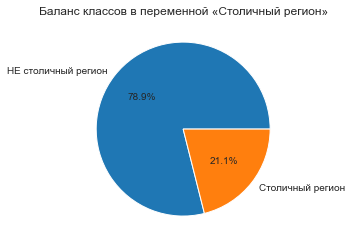

In [148]:
plt.pie(counts, labels = ['НЕ столичный регион', 'Столичный регион'], autopct = '%1.1f%%')
plt.title('Баланс классов в переменной «Столичный регион»');

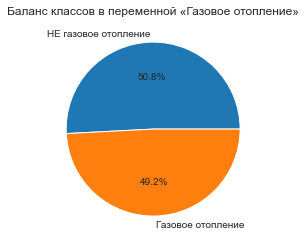

In [149]:
plt.pie(counts_, labels = ['НЕ газовое отопление', 'Газовое отопление'], autopct = '%1.1f%%')
plt.title('Баланс классов в переменной «Газовое отопление»');

## Анализ гистограмм

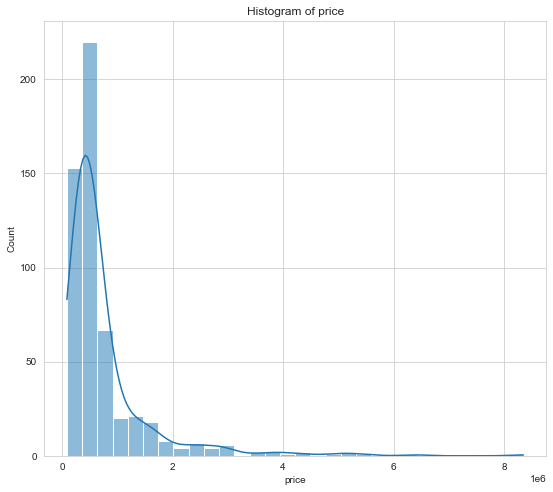

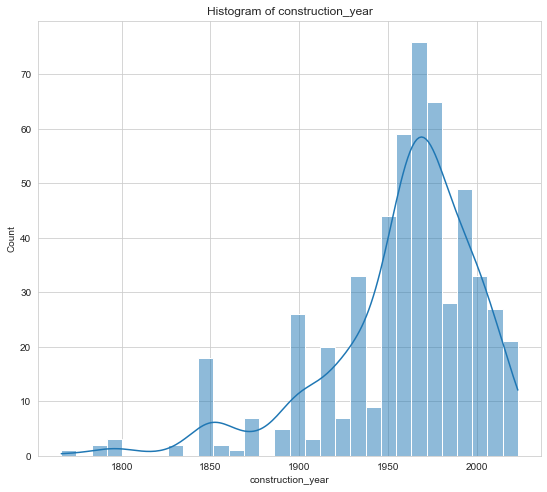

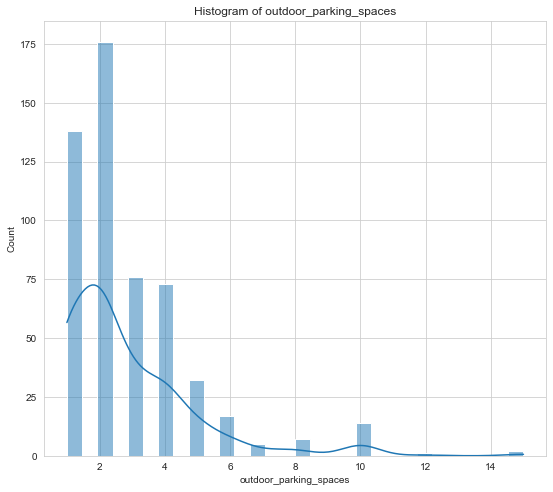

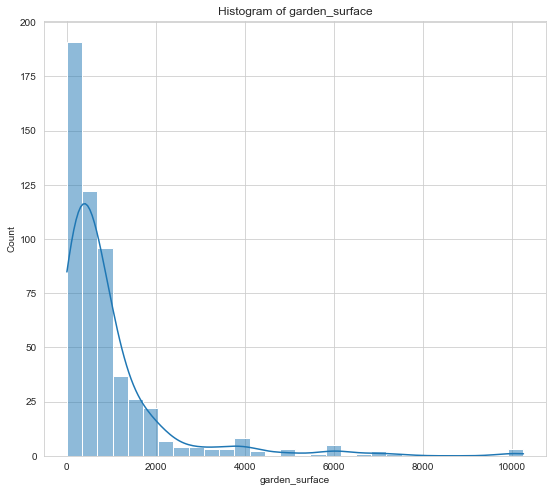

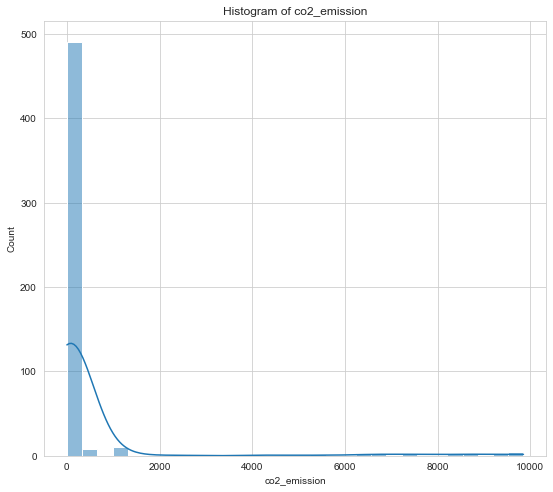

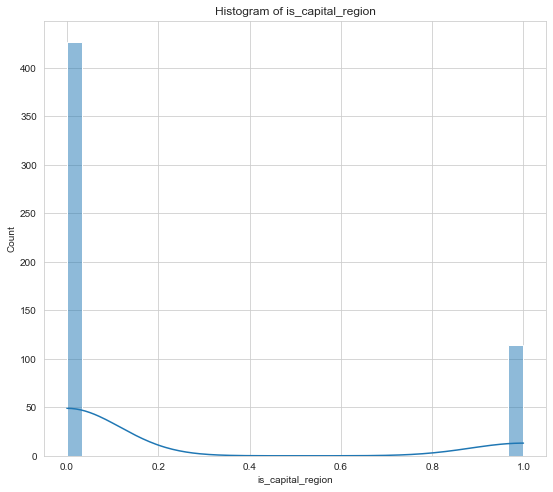

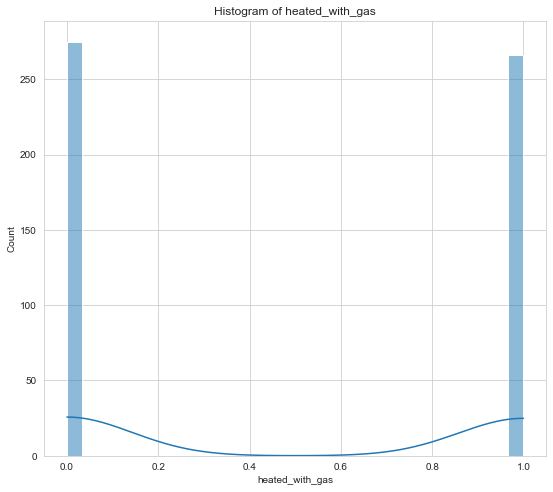

In [150]:
for column in dd.columns:
  plt.figure(figsize = (9, 8))
  sns.histplot(dd[column], kde = True, bins = 30)
  plt.title(f'Histogram of {column}')
  plt.show()

## Анализ ящичковых диаграмм (boxplot)

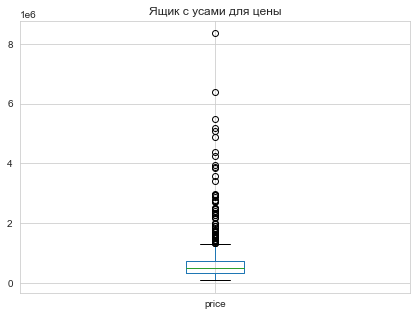

In [151]:
plt.figure(figsize = (7, 5))
dd.boxplot(column = 'price')
plt.title('Ящик с усами для цены');

In [152]:
#найдем верхнюю границу ящика с усами и посчитаем количество выбросов
max_ = dd['price'].describe()['75%'] + 1.5 * (dd['price'].describe()['75%'] - dd['price'].describe()['25%'])
dd.loc[dd['price'] > max_].shape[0]

69

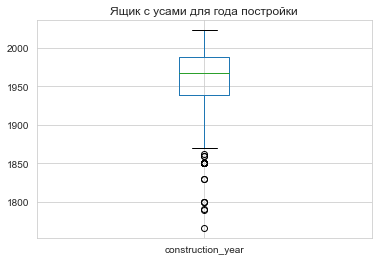

In [153]:
dd.boxplot(column = 'construction_year')
plt.title('Ящик с усами для года постройки');

In [154]:
#найдем нижнюю границу ящика с усами и посчитаем количество выбросов
max_ = dd['construction_year'].describe()['25%'] - 1.5 * (dd['construction_year'].describe()['75%'] - dd['construction_year'].describe()['25%'])
dd.loc[dd['construction_year'] < max_].shape[0]

29

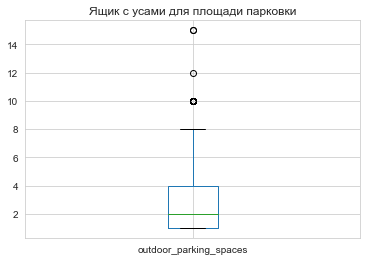

In [155]:
dd.boxplot(column = 'outdoor_parking_spaces')
plt.title('Ящик с усами для площади парковки');

In [156]:
#найдем верхнюю границу ящика с усами и посчитаем количество выбросов
max_ = dd['outdoor_parking_spaces'].describe()['75%'] + 1.5 * (dd['outdoor_parking_spaces'].describe()['75%'] - dd['outdoor_parking_spaces'].describe()['25%'])
dd.loc[dd['outdoor_parking_spaces'] > max_].shape[0]

17

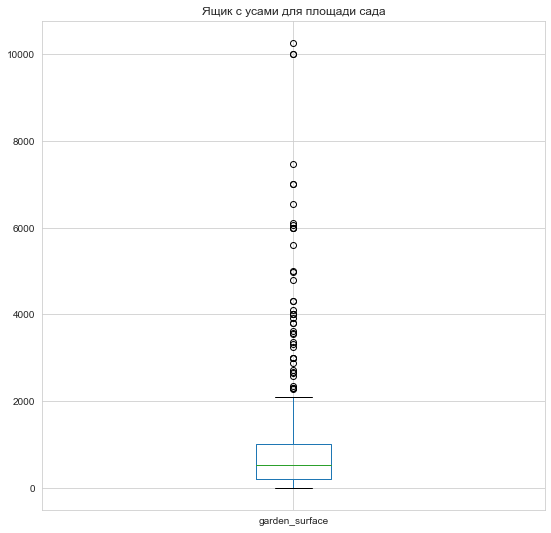

In [157]:
plt.figure(figsize = (9, 9))
dd.boxplot(column = 'garden_surface')
plt.title('Ящик с усами для площади сада');

In [158]:
#найдем верхнюю границу ящика с усами и посчитаем количество выбросов
max_ = dd['garden_surface'].describe()['75%'] + 1.5 * (dd['garden_surface'].describe()['75%'] - dd['garden_surface'].describe()['25%'])
dd.loc[dd['garden_surface'] > max_].shape[0]

45

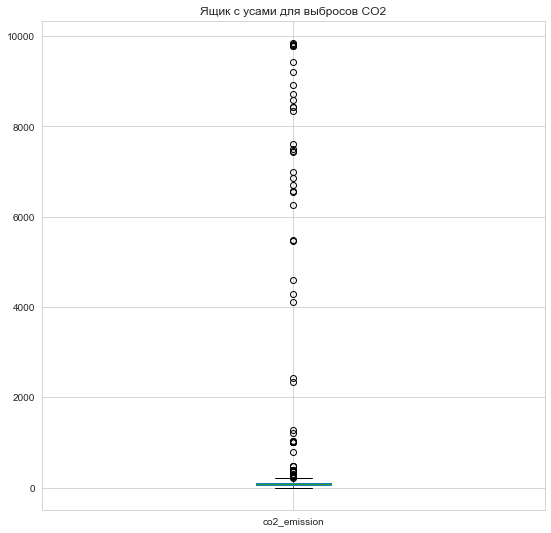

In [159]:
plt.figure(figsize = (9, 9))
dd.boxplot(column = 'co2_emission')
plt.title('Ящик с усами для выбросов CO2');

In [160]:
#найдем верхнюю границу ящика с усами и посчитаем количество выбросов
max_ = dd['co2_emission'].describe()['75%'] + 1.5 * (dd['co2_emission'].describe()['75%'] - dd['co2_emission'].describe()['25%'])
dd.loc[dd['co2_emission'] > max_].shape[0]

57

## Матрица корреляции и тепловая карта

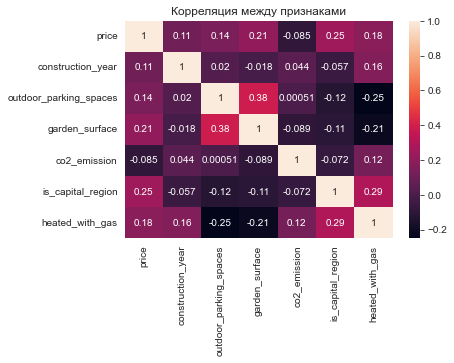

In [165]:
corr_matrix = dd.corr()
plt.title('Корреляция между признаками')
sns.heatmap(corr_matrix, annot = True);

In [166]:
corr_matrix['price'].round(2)

price                     1.00
construction_year         0.11
outdoor_parking_spaces    0.14
garden_surface            0.21
co2_emission             -0.08
is_capital_region         0.25
heated_with_gas           0.18
Name: price, dtype: float64

Можно говорить о сильной статистической зависимости, если коэффициент корреляции r > 0,7. Среди наших переменных не наблюдается сильной корреляции с ценой, поэтому все параметры будут в дальнейшем включены в модель регрессии.

## Анализ диаграмм рассеяния

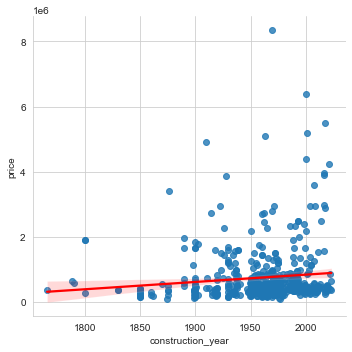

In [167]:
sns.set_style('whitegrid')
sns.lmplot(x ='construction_year', y ='price', data = dd, line_kws={"color": "red"});

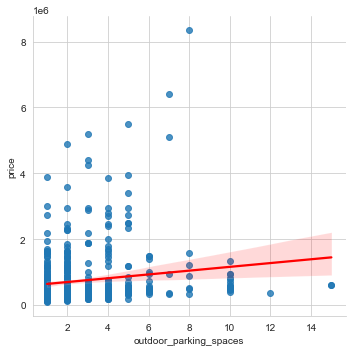

In [168]:
sns.lmplot(x ='outdoor_parking_spaces', y ='price', data = dd, line_kws={"color": "red"});

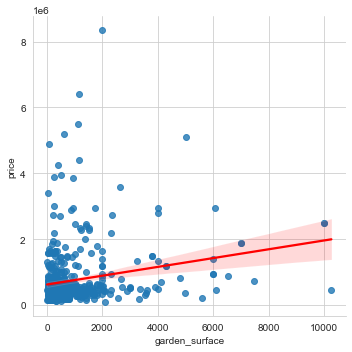

In [169]:
sns.lmplot(x ='garden_surface', y ='price', data = dd, line_kws={"color": "red"});

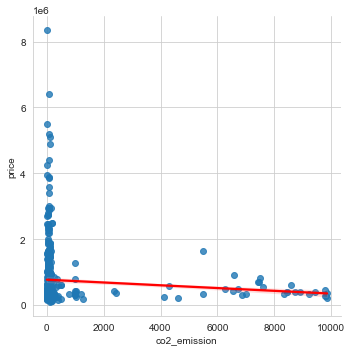

In [170]:
sns.lmplot(x ='co2_emission', y ='price', data = dd, line_kws={"color": "red"});

## Тест Чоу.

Для теста Чоу мы собираемся использовать модель без бинарных переменных. Мы также собираемся построить две разные подвыборки, одну для недвижимости с газовым отопление, а другую - без газового отопления, поскольку классы переменной heated_with_gas достаточно сбалансированы. 

Нулевая гипотеза теста Чоу заключается в том, что в двух подвыборках нет структурных изменений. То есть индивидуальные коэффициенты регрессии двух подвыборок равны.

$$Price = \beta_{0} + \beta_{1}Con +  \beta_{2}Par + \beta_{3}Gar + \beta_{4}CO_{2} + \varepsilon $$

$ H_{0}:
\begin{cases}
    \beta'_{0} = \beta''_{0} \\
    \beta'_{1} = \beta''_{1} \\ 
    \beta'_{2} = \beta''_{2} \\
    \beta'_{3} = \beta''_{3} \\
    \beta'_{4} = \beta''_{4} \\
\end{cases}
$

$ H_{1}: \exists i: \beta'_{i} \neq \beta''_{i} $

In [171]:
X = dd[['construction_year', 'outdoor_parking_spaces', 'garden_surface', 'co2_emission']]
y = dd['price']
lr = LinearRegression()
lr.fit(X,y)
result = smf.ols(formula= 'y ~ X', data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.380
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.47e-07
Time:                        18:49:02   Log-Likelihood:                -8140.9
No. Observations:                 541   AIC:                         1.629e+04
Df Residuals:                     536   BIC:                         1.631e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.009e+06   1.64e+06     -2.441      0.0

Подвыборка 1. Недвижимость с газовым отоплением.

$$ Price = \beta'_{0} + \beta'_{1}Con +  \beta'_{2}Par + \beta'_{3}Gar + \beta'_{4}CO_{2} + \varepsilon $$

In [172]:
dd_gas = dd[dd.heated_with_gas == 1]
X1 = dd_gas[['construction_year', 'outdoor_parking_spaces', 'garden_surface', 'co2_emission']]
y1 = dd_gas['price']
lr.fit(X1, y1)
result_1 = smf.ols(formula= 'y1 ~ X1', data = dd_gas).fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     7.472
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.03e-05
Time:                        18:49:04   Log-Likelihood:                -4026.2
No. Observations:                 266   AIC:                             8062.
Df Residuals:                     261   BIC:                             8080.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.136e+06   3.18e+06     -1.927      0.0

Подвыборка 2. Недвижимость без газового отопления.

$$ Price = \beta''_{0} + \beta''_{1}Con +  \beta''_{2}Par + \beta''_{3}Gar + \beta''_{4}CO_{2} + \varepsilon $$

In [173]:
dd_no_gas = dd[dd.heated_with_gas == 0]
X2 = dd_no_gas[['construction_year', 'outdoor_parking_spaces', 'garden_surface', 'co2_emission']]
y2 = dd_no_gas['price']
lr.fit(X2, y2)
result_2 = smf.ols(formula= 'y2 ~ X2', data = dd_no_gas).fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     7.552
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           8.83e-06
Time:                        18:49:06   Log-Likelihood:                -4084.1
No. Observations:                 275   AIC:                             8178.
Df Residuals:                     270   BIC:                             8196.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.504e+05   1.69e+06     -0.504      0.6

In [174]:
rss_full = ((result.resid)**2).sum()
rss_1 = ((result_1.resid)**2).sum()
rss_2 = ((result_2.resid)**2).sum()
numerator = ((rss_full - (rss_1 + rss_2)) / 5)
denominator = ((rss_1 + rss_2) / (549 - 5 * 2))
chow_stat = numerator / denominator
chow_stat

8.197054607426441

In [175]:
# F-критическое на уровне значимости 5%
st.f.ppf(q = 1 - 0.05, dfn = 5, dfd = (549 - 5 * 2))

2.230739166375008

In [176]:
# F-критическое на уровне значимости 10%
st.f.ppf(q = 1 - 0.1, dfn = 5, dfd = (549 - 5 * 2))

1.8579876611906176

In [177]:
# F-критическое на уровне значимости 1%
st.f.ppf(q = 1 - 0.01, dfn = 5, dfd = (549 - 5 * 2))

3.051295138140155

$$F_{расчётное} > F_{критическое} => $$ нулевая гипотеза отвергается при любом разумном уровне значимости, для недвижимости с газовым отоплением и без имеет место разная зависимость. То есть не следует оценивать объединённую выборку. В таком случае вводятся dummy переменные, позволяющие не задавать заранее какой-либо коэффициент одинаковым для обеих подвыборок.

Добавление дополнительного фактора/фиктивной переменной для указания того, находится ли недвижимость в столичном регионе, может помочь более точно описать взаимосвязи в каждой из подвыборок, так как между данными признаками наблюдается слабая корреляция.

## Оценка модели.


$$Price = \beta_{0} + \beta_{1}Con +  \beta_{2}Par + \beta_{3}Gar + \beta_{4}CO_{2} + \beta_{5}Cap + \beta_{6}Gas + \varepsilon $$

In [178]:
X = dd[['construction_year', 'outdoor_parking_spaces', 'garden_surface', 'co2_emission', 'is_capital_region', 'heated_with_gas']]
y = dd['price']
lr = LinearRegression()
lr.fit(X,y)
result = smf.ols(formula= 'y ~ X', data=dd).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     18.46
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.52e-19
Time:                        18:49:13   Log-Likelihood:                -8108.2
No. Observations:                 541   AIC:                         1.623e+04
Df Residuals:                     534   BIC:                         1.626e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.684e+06   1.57e+06     -2.340      0.0

In [179]:
result_df = pd.DataFrame(result.summary().tables[1].data[1:], columns = result.summary().tables[1].data[0])

# Преобразуем значения в числа и округлим до двух знаков после запятой
result_df = result_df.apply(pd.to_numeric, errors = 'ignore')
result_df = result_df.round(3)

# Сохранение DataFrame в Excel
result_df.to_excel('regression_results.xlsx', index = False, header = True)